# Ultrasonic Exploratory Data Analysis

This notebook will be exploring data from sensor using the version 2 platform.

The data collection procedure was as following
1. Mount arduino on the platform. During this Data collection we used arduino 1 only
2. Mount Ultrasonic Sensor that will be tested on to breadboard
3. Upload "automate_data_collection_v1.ino" and run "US_datacollection_v4.py"
4. Starting from delay 16800us and run "S" which is a sequence of datacollection that will automatically move the surface closer to ultrasonic sensor with set increments.
5. Repeat it by adjust delay into 10000us, 8000us,6000us, and 3000us 

## Load Data

In [16]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the folder path
folder_path = '../ultra_sonic_sensor/fully_automate/data_v4'

# Check if the folder exists and list the files
if os.path.exists(folder_path):
    # Generate list of file paths
    file_paths = [os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.endswith('.csv')]
    print("List of CSV files:", file_paths)
else:
    print("Folder not found")

List of CSV files: ['../ultra_sonic_sensor/fully_automate/data_v4/test_seq_ard1_sensor3_13_47_48_27062024.csv', '../ultra_sonic_sensor/fully_automate/data_v4/test_seq_ard1_sensor3_13_52_41_27062024.csv', '../ultra_sonic_sensor/fully_automate/data_v4/test_seq_ard1_sensor6_14_30_37_27062024.csv', '../ultra_sonic_sensor/fully_automate/data_v4/test_seq_ard1_sensor4_14_08_42_27062024.csv', '../ultra_sonic_sensor/fully_automate/data_v4/test_seq_ard1_sensor4_14_01_09_27062024.csv', '../ultra_sonic_sensor/fully_automate/data_v4/test_seq_ard1_sensor3_13_55_01_27062024.csv', '../ultra_sonic_sensor/fully_automate/data_v4/test_seq_ard1_sensor1_13_05_40_27062024.csv', '../ultra_sonic_sensor/fully_automate/data_v4/test_seq_ard1_sensor2_13_24_59_27062024.csv', '../ultra_sonic_sensor/fully_automate/data_v4/test_seq_ard1_sensor4_14_06_20_27062024.csv', '../ultra_sonic_sensor/fully_automate/data_v4/test_seq_ard1_sensor2_13_18_12_27062024.csv', '../ultra_sonic_sensor/fully_automate/data_v4/test_seq_ard1_

In [8]:
def merge_csv_files(file_paths):
    """
    Merge multiple CSV files into a single DataFrame.

    Parameters:
    file_paths (list of str): List of file paths to the CSV files.

    Returns:
    DataFrame: Merged DataFrame containing data from all input CSV files.
    """
    dataframes = []
    for file in file_paths:
        df = pd.read_csv(file)
        dataframes.append(df)

    # Concatenate all DataFrames
    merged_df = pd.concat(dataframes, ignore_index=True)
    
    return merged_df

In [12]:
# Merge CSV files
merged_df = merge_csv_files(file_paths)
merged_df

,Trial,Ping Duration,Distance (cm),Ping Time (us),Delay (us),Steps,Arduino ID,Sensor ID,Range (cm),Sensor length (cm),...,Angle on XY plane,side a (cm),side b (cm),side c (cm),Angle on YZ plane,Sensor Configuration,Sensor Angle,Surface material,Surface Length (cm),Surface Width (cm)
0,0,3964,53,3039,16800,0,11,3,53,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,wood,NaN,NaN
1,1,3964,53,3043,16800,0,11,3,53,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,wood,NaN,NaN
2,2,3952,53,3035,16800,0,11,3,53,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,wood,NaN,NaN
3,3,3956,53,3035,16800,0,11,3,53,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,wood,NaN,NaN
4,4,3960,53,3039,16800,0,11,3,53,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,wood,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35995,95,11004,12,739,8000,10480,1,1,13,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,wood,NaN,NaN
35996,96,11012,12,735,8000,10480,1,1,13,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,wood,NaN,NaN
35997,97,11008,12,739,8000,10480,1,1,13,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,wood,NaN,NaN
35998,98,11012,12,739,8000,10480,1,1,13,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,wood,NaN,NaN


In [13]:
merged_df.columns

Index(['Trial', 'Ping Duration', 'Distance (cm)', 'Ping Time (us)',
       'Delay (us)', 'Steps', 'Arduino ID', 'Sensor ID', 'Range (cm)',
       'Sensor length (cm)', 'Color of sensor', 'Angle on XY plane',
       'side a (cm)', 'side b (cm)', 'side c (cm)', 'Angle on YZ plane',
       'Sensor Configuration', 'Sensor Angle', 'Surface material',
       'Surface Length (cm)', 'Surface Width (cm)'],
      dtype='object')

### Clean data 

Remove columns with NaN. Currently NaN column are irrelevant so would be dropped

In [34]:
# Remove columns with any NaN values
cleaned_df = merged_df.dropna(axis=1)
cleaned_df

,Trial,Ping Duration,Distance (cm),Ping Time (us),Delay (us),Steps,Arduino ID,Sensor ID,Range (cm),Color of sensor,Surface material
0,0,3964,53,3039,16800,0,11,3,53,b,wood
1,1,3964,53,3043,16800,0,11,3,53,b,wood
2,2,3952,53,3035,16800,0,11,3,53,b,wood
3,3,3956,53,3035,16800,0,11,3,53,b,wood
4,4,3960,53,3039,16800,0,11,3,53,b,wood
...,...,...,...,...,...,...,...,...,...,...,...
35995,95,11004,12,739,8000,10480,1,1,13,b,wood
35996,96,11012,12,735,8000,10480,1,1,13,b,wood
35997,97,11008,12,739,8000,10480,1,1,13,b,wood
35998,98,11012,12,739,8000,10480,1,1,13,b,wood


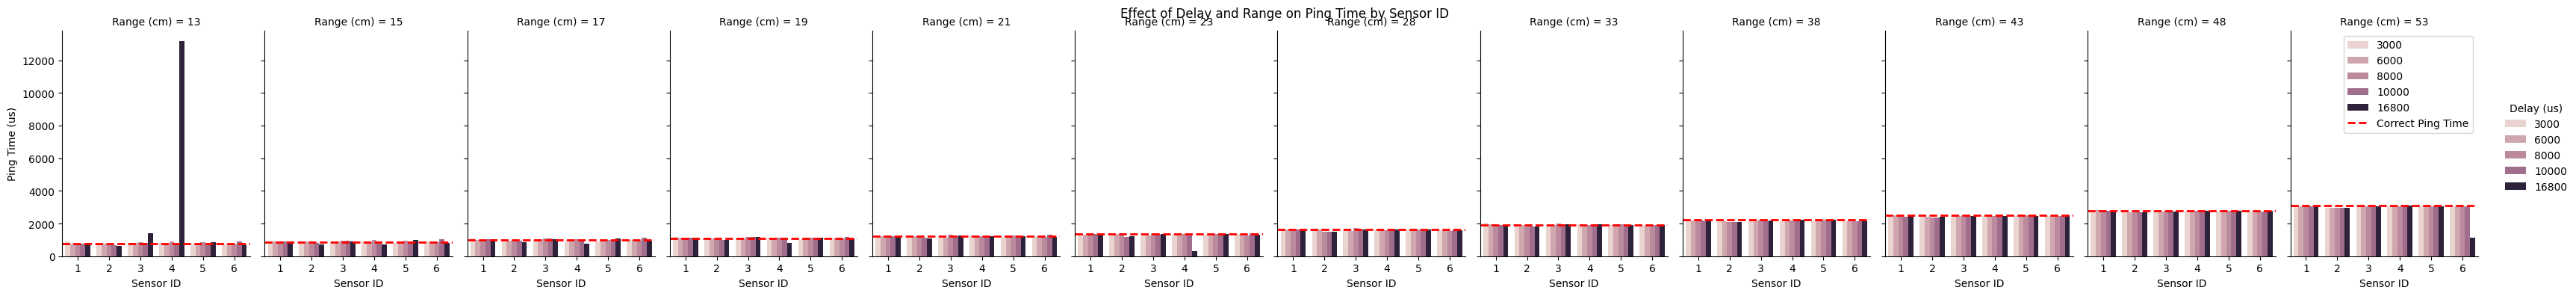

In [40]:
# Function to visualize the effect of delay and range on ping time
def visualize_delay_and_range_effect_on_ping_time(df):
    """
    Visualize the effect of delay and range on ping time.

    Parameters:
    df (DataFrame): The DataFrame containing the data.
    """
    
    # Group by sensor ID, delay, and range, then calculate the mean ping time
    grouped_df = df.groupby(['Sensor ID', 'Delay (us)', 'Range (cm)'])['Ping Time (us)'].mean().reset_index()
    
    # Create the visualization
    g = sns.catplot(
        x='Sensor ID', 
        y='Ping Time (us)', 
        hue='Delay (us)', 
        col='Range (cm)', 
        data=grouped_df, 
        kind='bar', 
        height=4, 
        aspect=0.7
    )
    
    # Add horizontal lines for correct ping times based on range
    for ax in g.axes.flatten():
        range_val = float(ax.get_title().split('=')[1].strip())
        correct_ping_time = (2 * range_val / 100) / 343 * 1e6
        ax.axhline(correct_ping_time, color='red', linestyle='--', linewidth=2, label='Correct Ping Time')
    
    plt.subplots_adjust(top=0.9)
    plt.suptitle('Effect of Delay and Range on Ping Time by Sensor ID')
    plt.legend()
    plt.show()


# Visualize the effect of delay and range on ping time
visualize_delay_and_range_effect_on_ping_time(cleaned_df)


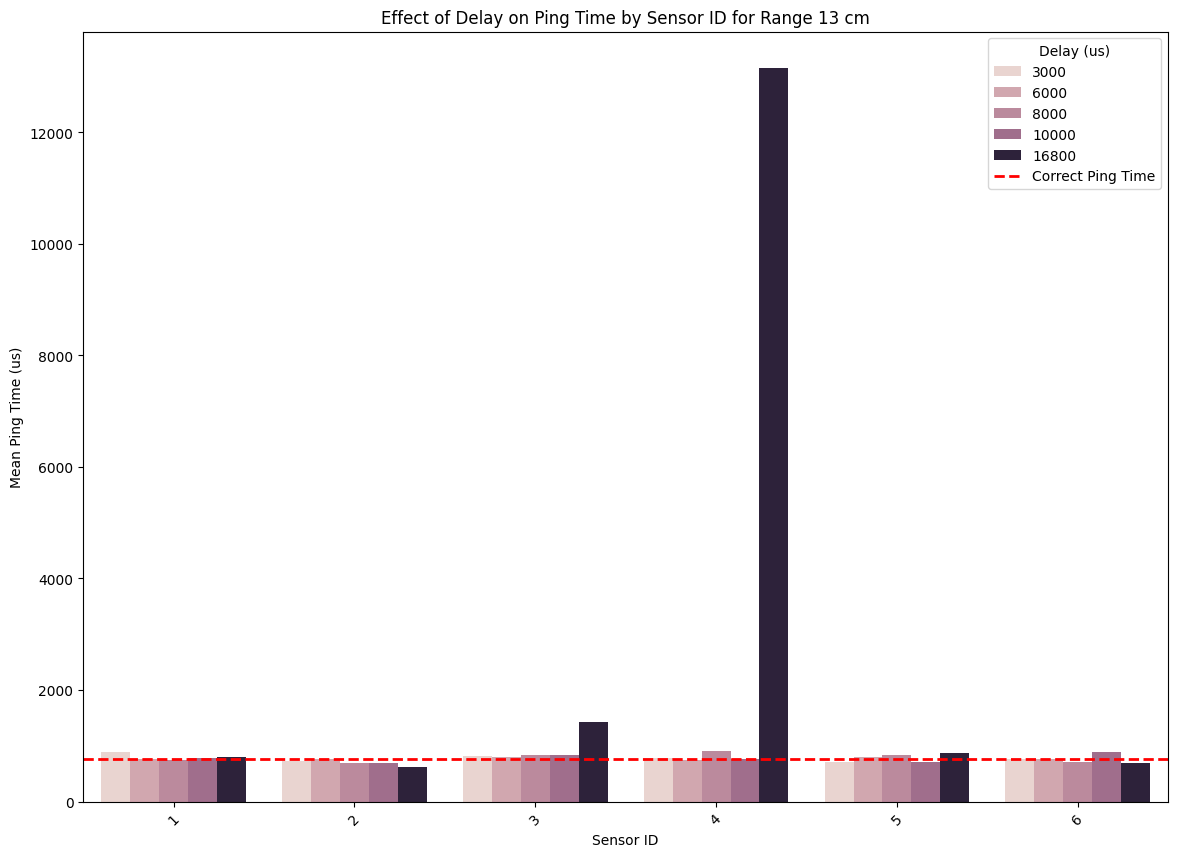

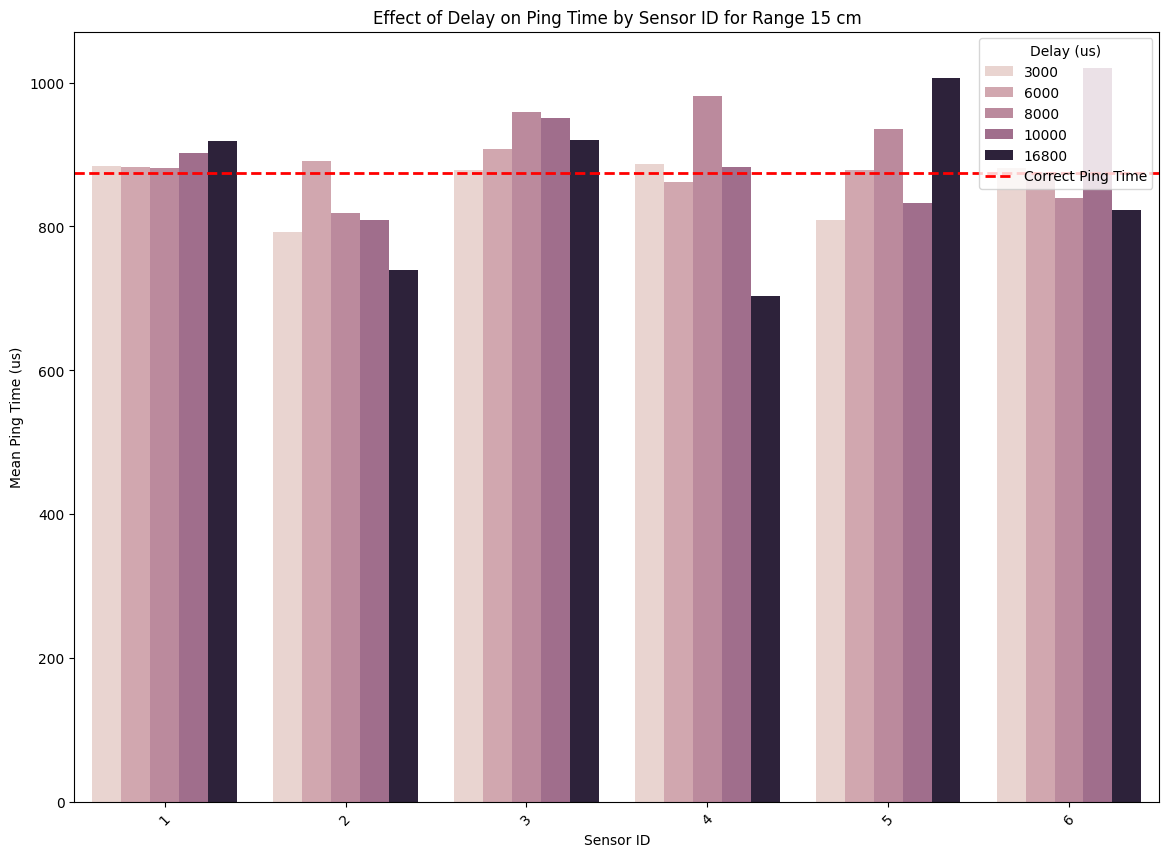

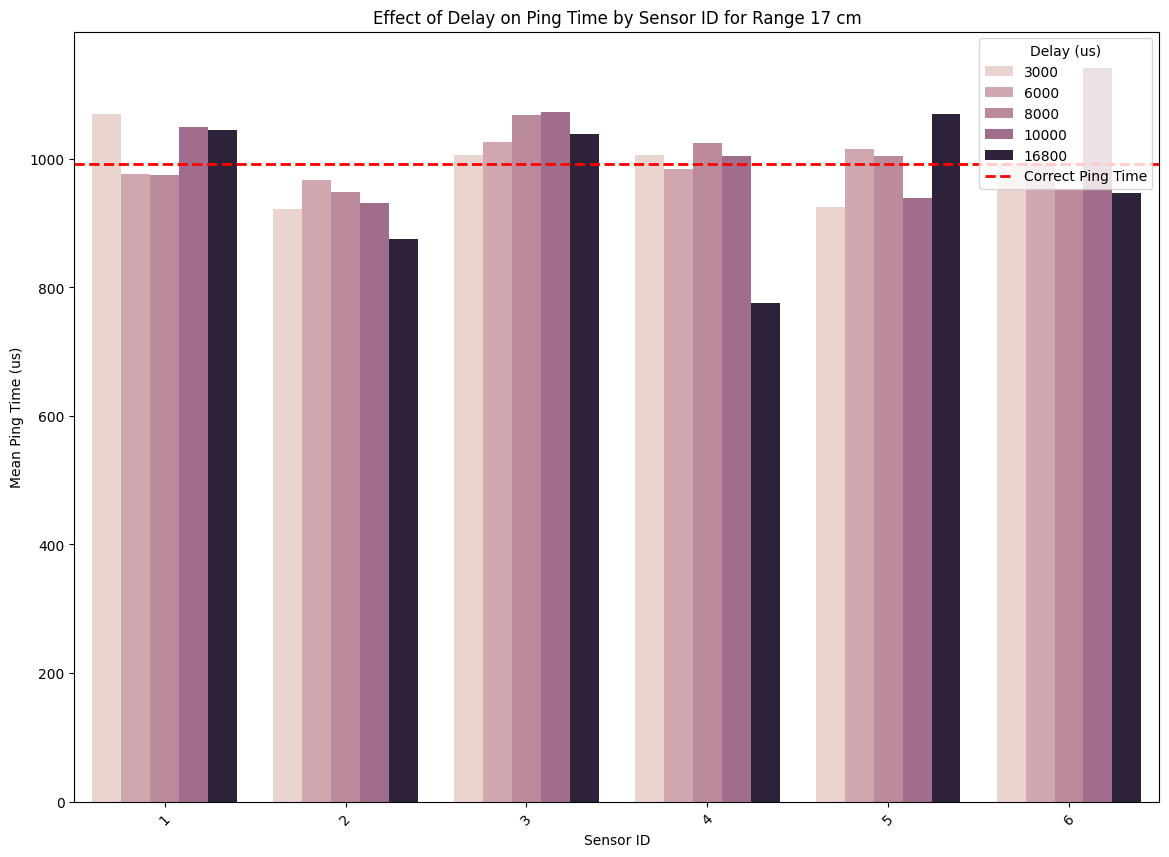

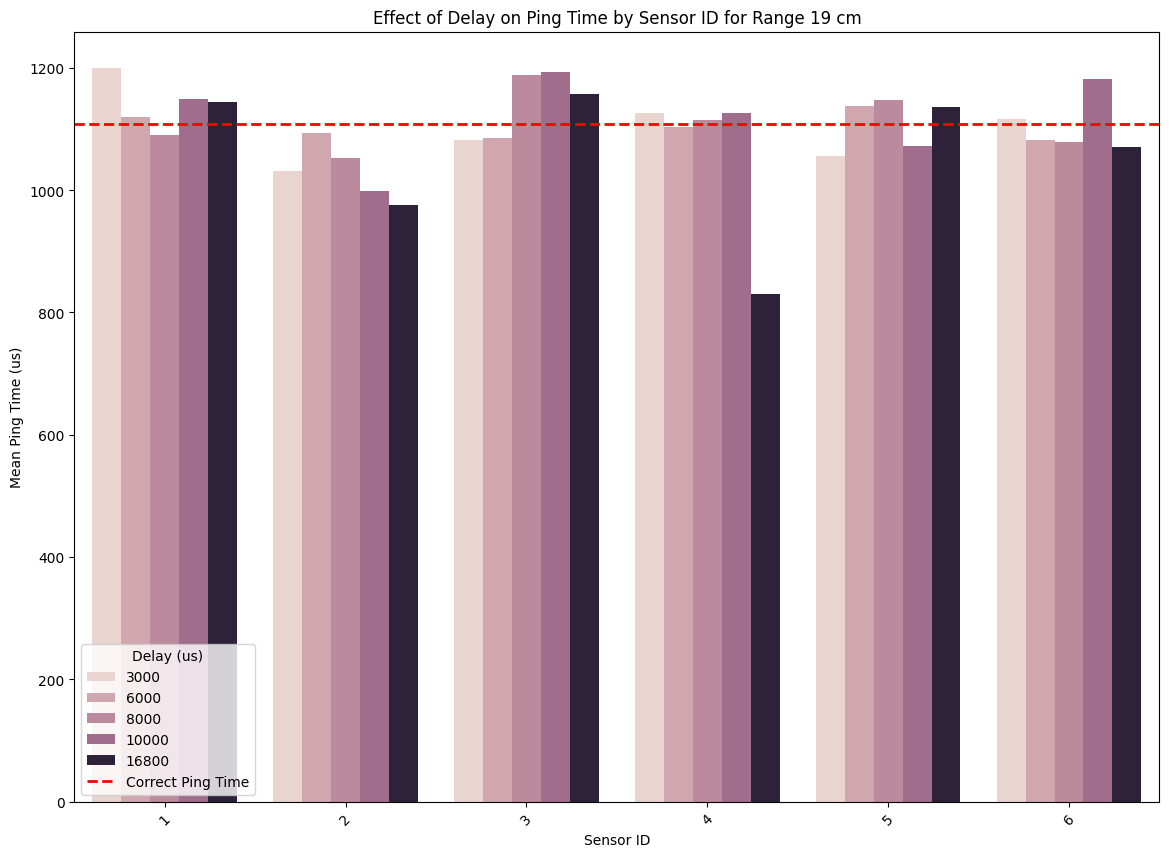

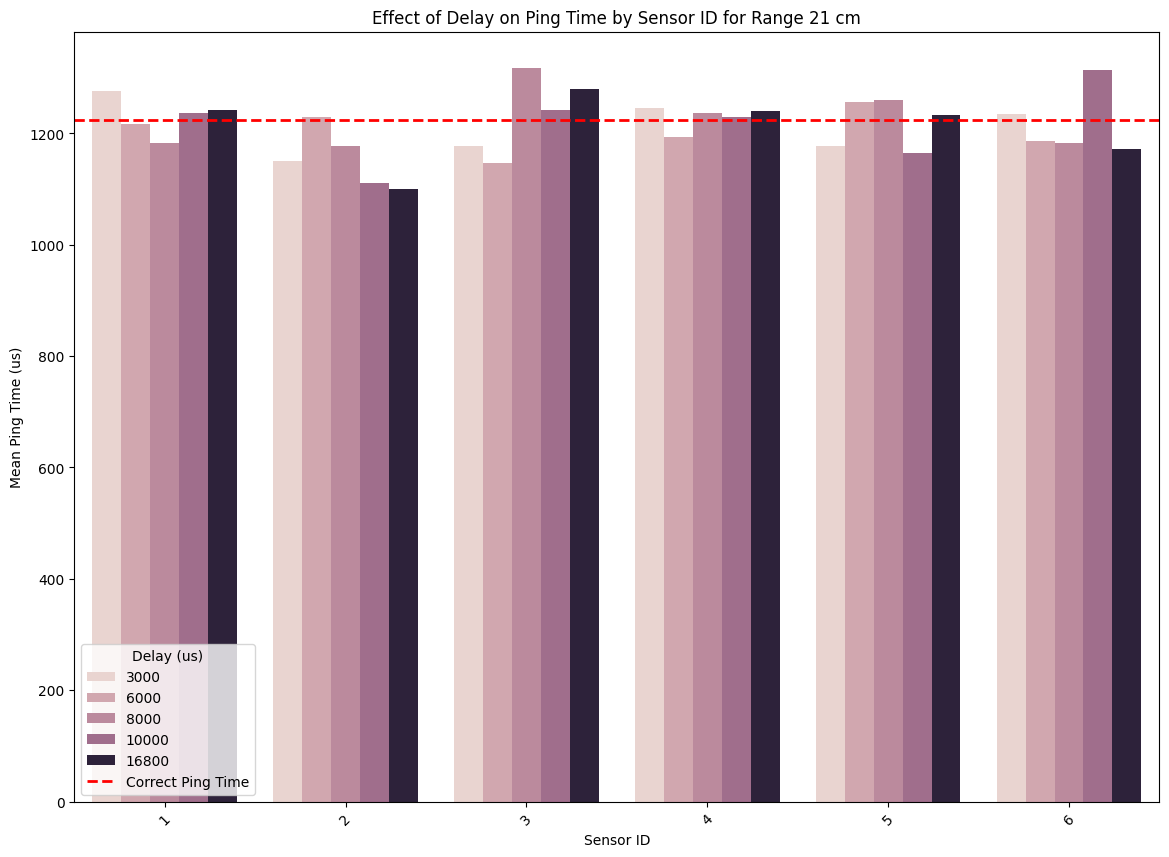

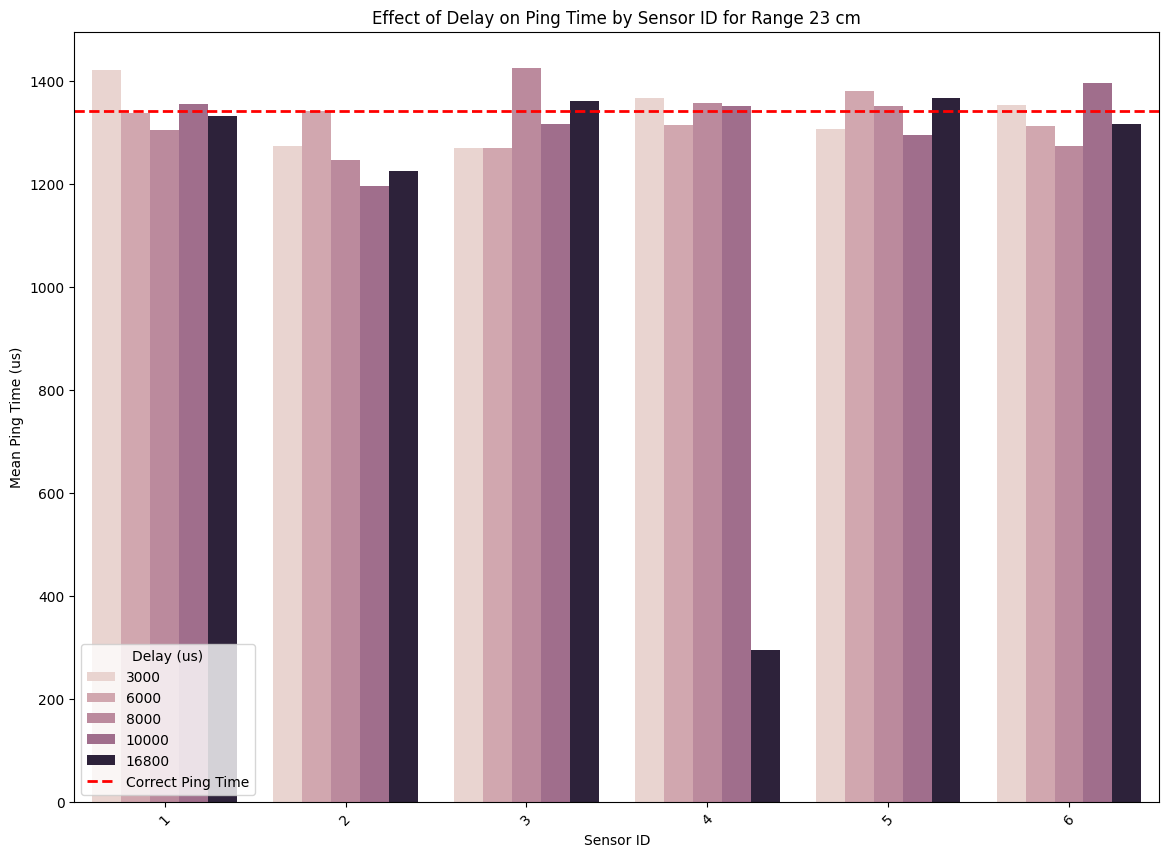

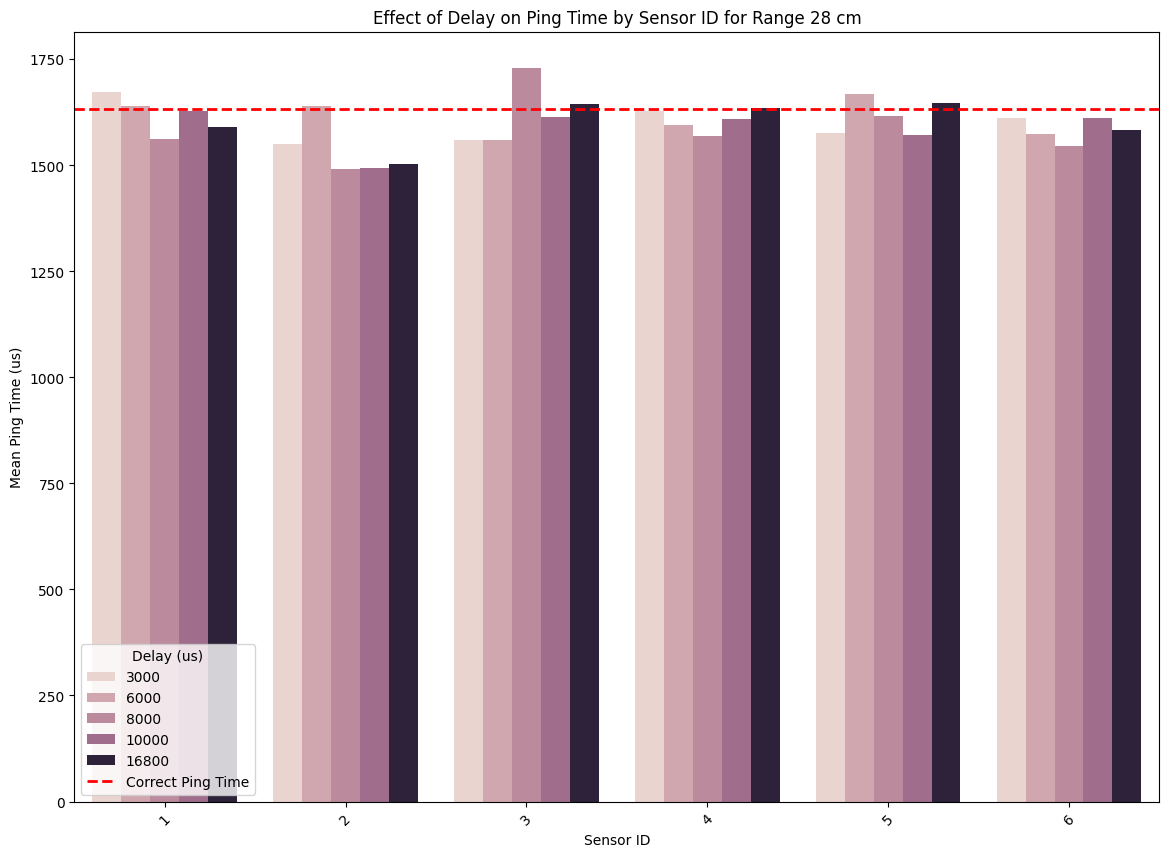

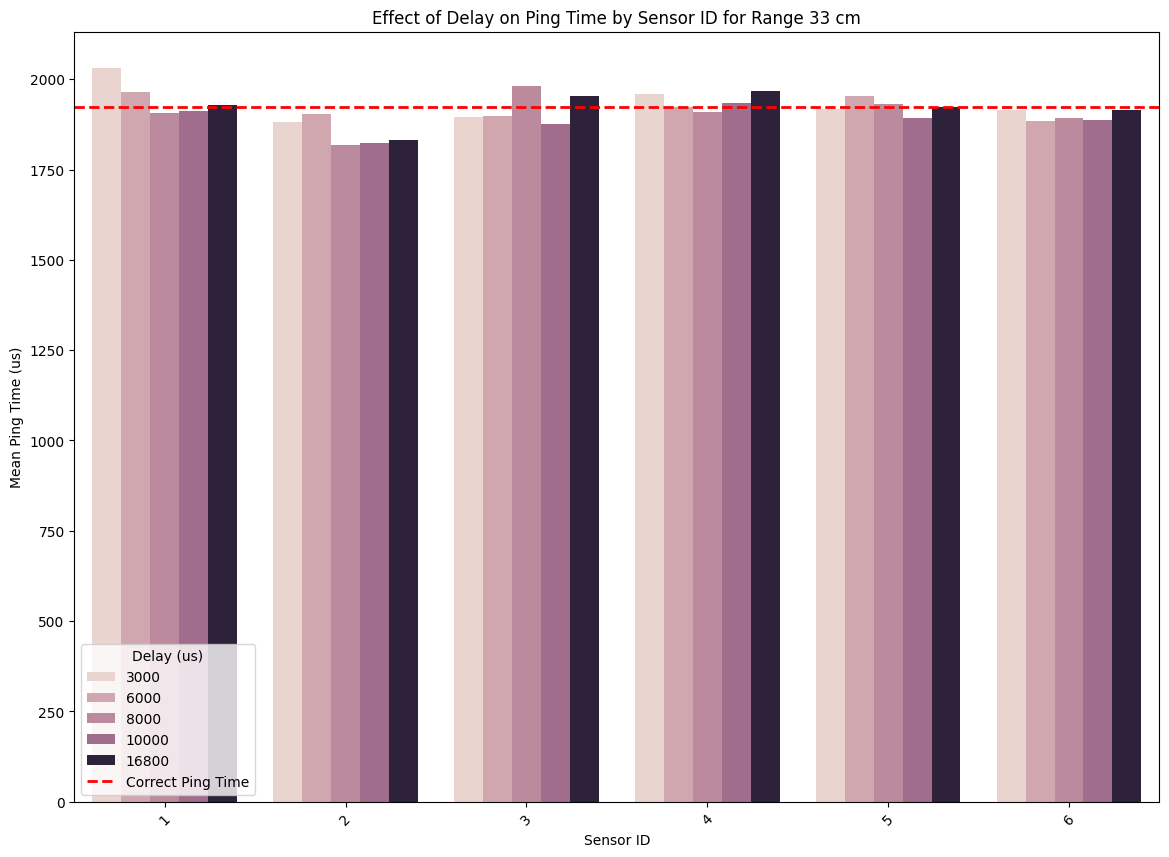

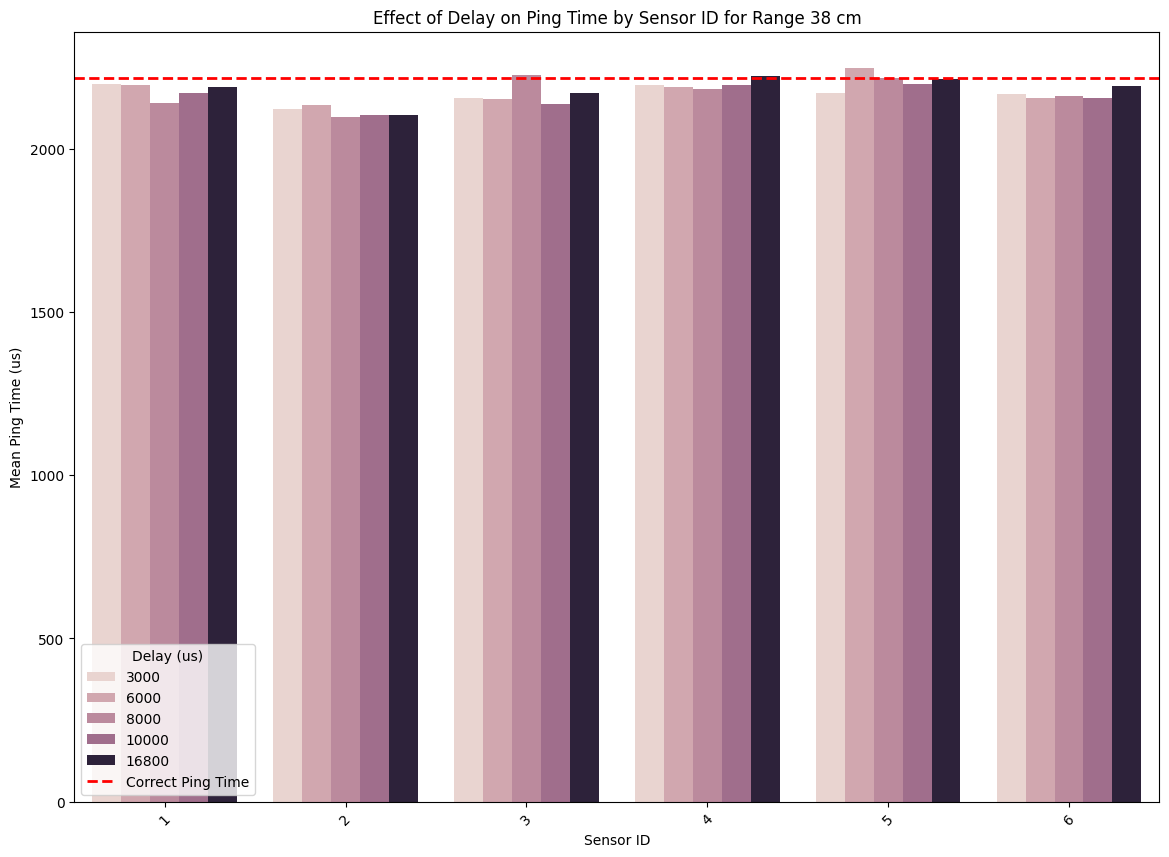

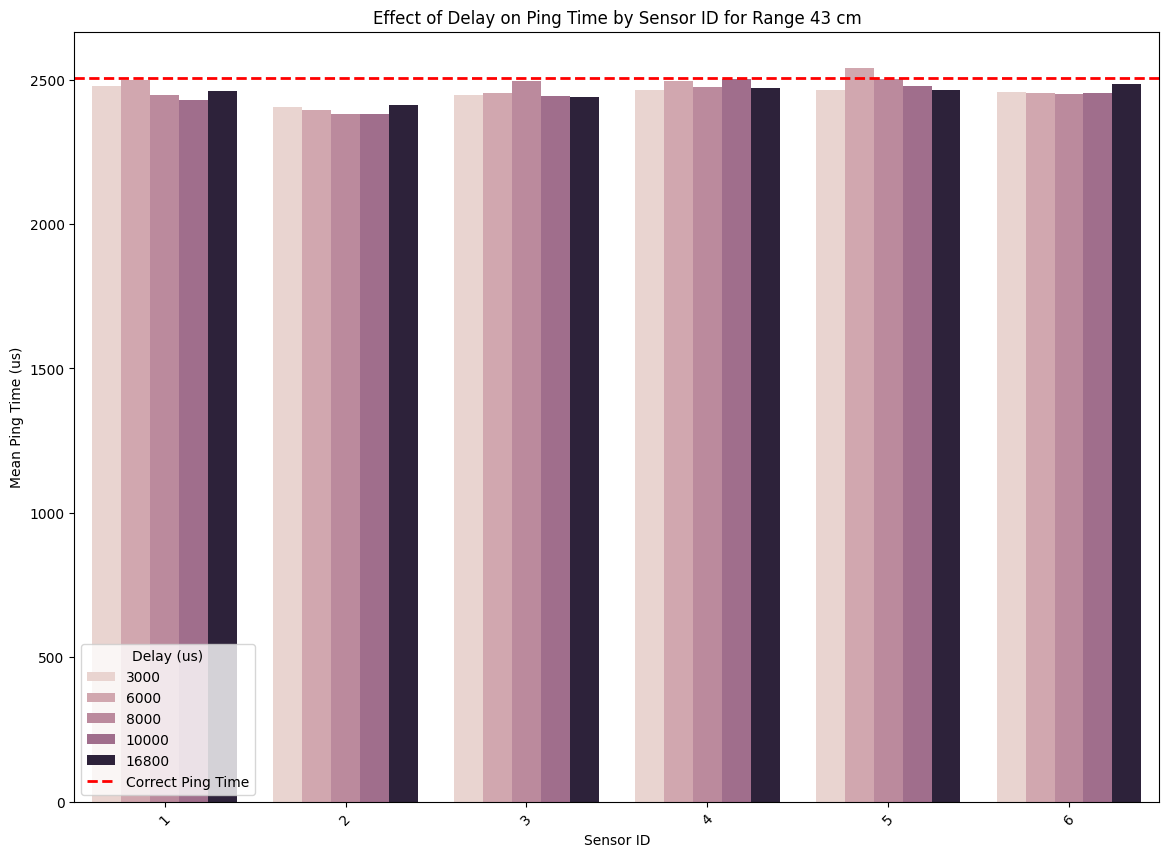

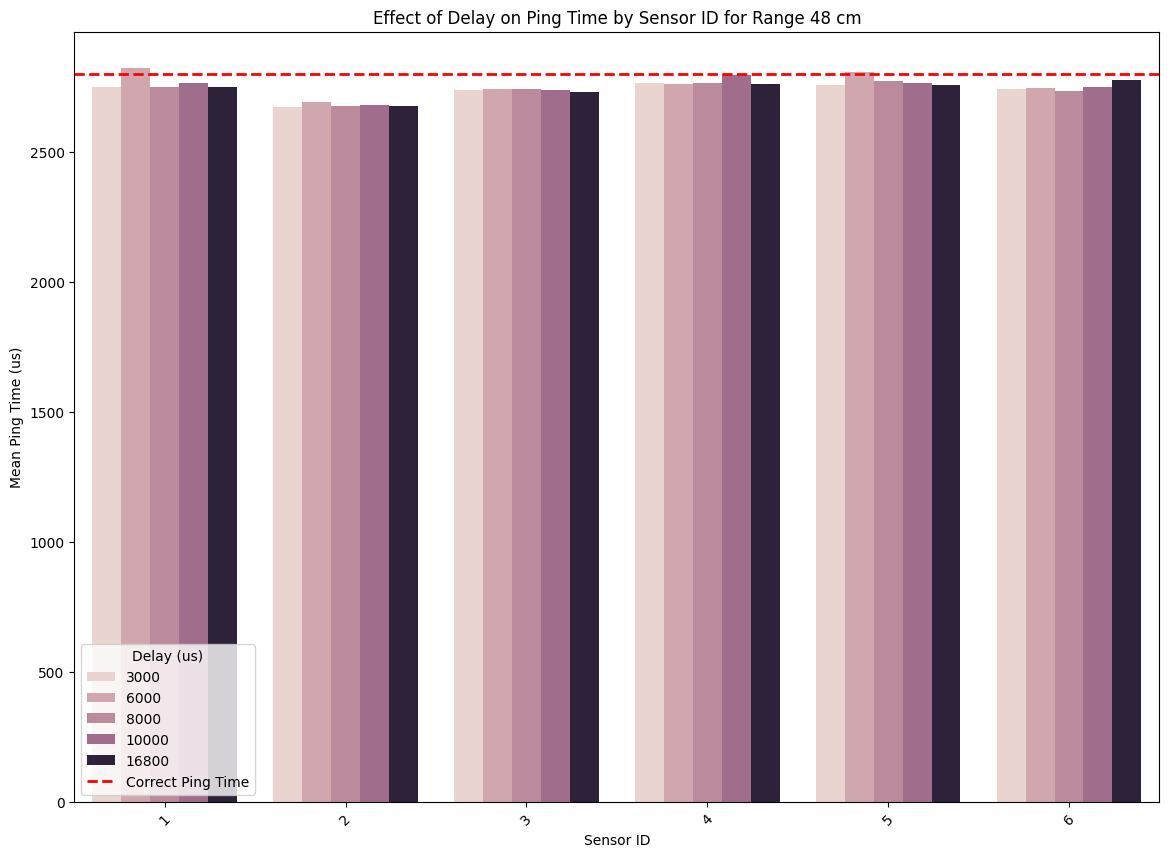

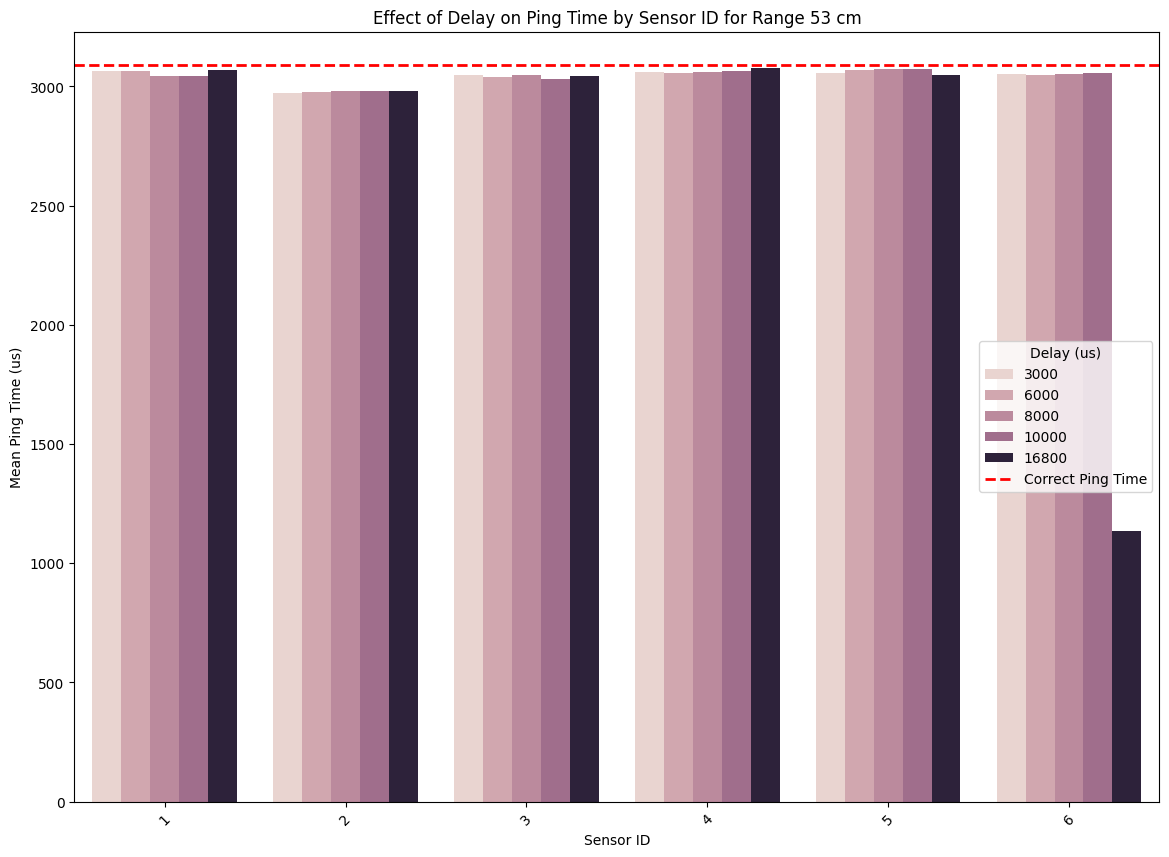

In [41]:
# Function to visualize the effect of delay and range on ping time
def visualize_delay_and_range_effect_on_ping_time(df):
    """
    Visualize the effect of delay and range on ping time.

    Parameters:
    df (DataFrame): The DataFrame containing the data.
    """
    # Group by sensor ID, delay, and range, then calculate the mean ping time
    grouped_df = df.groupby(['Sensor ID', 'Delay (us)', 'Range (cm)'])['Ping Time (us)'].mean().reset_index()
    
    # Create individual plots for each range
    unique_ranges = grouped_df['Range (cm)'].unique()
    
    for range_val in unique_ranges:
        subset_df = grouped_df[grouped_df['Range (cm)'] == range_val]
        plt.figure(figsize=(14, 10))
        sns.barplot(
            x='Sensor ID', 
            y='Ping Time (us)', 
            hue='Delay (us)', 
            data=subset_df
        )
        
        correct_ping_time = (2 * range_val / 100) / 343 * 1e6
        plt.axhline(correct_ping_time, color='red', linestyle='--', linewidth=2, label='Correct Ping Time')
        
        plt.title(f'Effect of Delay on Ping Time by Sensor ID for Range {range_val} cm')
        plt.xlabel('Sensor ID')
        plt.ylabel('Mean Ping Time (us)')
        plt.legend(title='Delay (us)')
        plt.xticks(rotation=45)
        plt.show()

visualize_delay_and_range_effect_on_ping_time(cleaned_df)